In [22]:
import glob
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [29]:
dataset_dir = '/datatmp/Datasets/synthia-sf/SYNTHIA-SF/'
rgb_images  = 'SEQ[12345]/RGBLeft/*.png'
rgb_glob    = glob.glob( os.path.join(dataset_dir, rgb_images))
rgb_glob.sort()
output_dir  = '/home/belbarashy/synthia_imp_maps_laplacian/' 

In [40]:
def get_importance_map(im_path):
  min_weight = 25  # should be greater than 0
  dilation_kernel = np.ones((3, 3), np.uint8)

  rgb_im  = cv2.imread(str(im_path))
  #rgb_im  = im_path
  blurred = cv2.GaussianBlur(rgb_im,(5,5),3)
  gray    = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
  high_thresh, thresh_im = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
  high_thresh = 1 * high_thresh
  low_thresh  = 0.5 * high_thresh
  edges_im    = cv2.Canny(gray, 10, 100)
  weighted_im = np.clip(edges_im, min_weight, 255)
  weighted_im = cv2.dilate(weighted_im, dilation_kernel, iterations=1)
  #weighted_im = np.expand_dims(weighted_im, axis=2)
  return weighted_im

In [25]:
"""
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, p in enumerate(rgb_glob):
    imp_map = get_importance_map(p)
    imp_map_path = os.path.join(output_dir,str(i)+'.png')
    cv2.imwrite(imp_map_path, imp_map)
"""

"\nif not os.path.exists(output_dir):\n    os.makedirs(output_dir)\n\nfor i, p in enumerate(rgb_glob):\n    imp_map = get_importance_map(p)\n    imp_map_path = os.path.join(output_dir,str(i)+'.png')\n    cv2.imwrite(imp_map_path, imp_map)\n"

In [60]:
output_dir  = '/home/belbarashy/synthia_imp_maps_laplacian/' 
dataset_dir = output_dir
map_images  = '*.png'
map_glob    = glob.glob( os.path.join(output_dir, map_images))
map_glob.sort(key=lambda ff: int(os.path.splitext(os.path.split(ff)[1])[0]))

/home/belbarashy/synthia_imp_maps_laplacian/


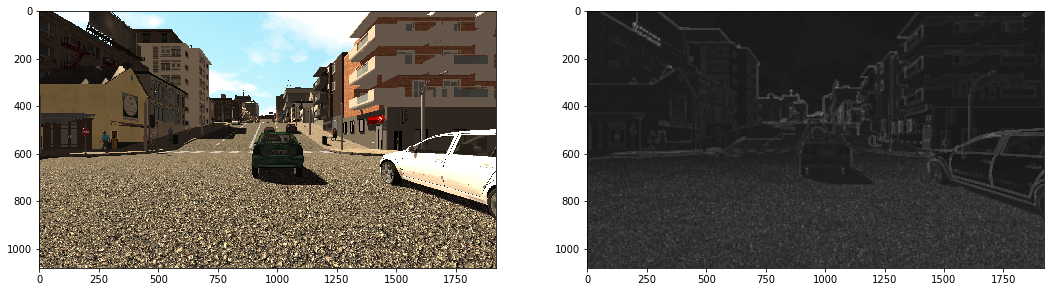

In [63]:
idx = 100
print(output_dir)
map_im  = cv2.imread(os.path.join(map_glob[idx]))
rgb_im  = cv2.imread(os.path.join(rgb_glob[idx]))
plt.figure(figsize=(18, 18))
plt.subplot(221)
plt.imshow( rgb_im[:,:,::-1] )
plt.subplot(222)
plt.imshow( map_im[:,:,::-1])

In [47]:
def get_importance_map_laplacian(im_path):
  min_weight = 25  # should be greater than 0
  dilation_kernel = np.ones((3, 3), np.uint8)
  rgb_im   = cv2.imread(str(im_path))
  blurred  = cv2.GaussianBlur(rgb_im,(5,5),3)
  gray     = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
  laplacian = np.abs(cv2.Laplacian(gray,cv2.CV_64F))
  laplacian = cv2.convertScaleAbs(laplacian) + min_weight
  weighted_im = np.clip(laplacian, 0, 255)
  weighted_im = cv2.dilate(weighted_im, dilation_kernel, iterations=2)
  weighted_im = np.expand_dims(weighted_im, axis=2)
  return weighted_im

In [48]:
"""
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

for i, p in enumerate(rgb_glob):
    imp_map = get_importance_map_laplacian(p)
    imp_map_path = os.path.join(output_dir,str(i)+'.png')
    cv2.imwrite(imp_map_path, imp_map)
"""    

(1080, 1920)
(1080, 1920, 3)


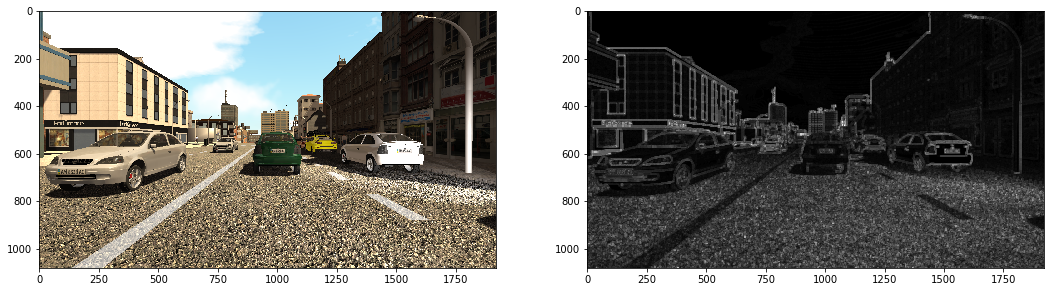

In [46]:
idx = 25
map_im  = get_importance_map_laplacian(rgb_glob[idx])
rgb_im  = cv2.imread(rgb_glob[idx])
print(map_im.shape)
print(rgb_im.shape)
plt.figure(figsize=(18, 18))
plt.subplot(221)
plt.imshow( rgb_im[:,:,::-1] )
plt.subplot(222)
plt.imshow( map_im,cmap = 'gray')